In [1]:
import os

In [2]:
os.environ['KAGGLE_USERNAME'] = 'mason0908'
os.environ['KAGGLE_KEY'] = 'd6bcff4b46ed3f938f86b1a4d69f1694'

In [3]:
!kaggle datasets download -d START-UMD/gtd

 94% 27.0M/28.7M [00:00<00:00, 46.9MB/s]
100% 28.7M/28.7M [00:00<00:00, 44.1MB/s]


In [4]:
!unzip *.*

Archive:  gtd.zip
  inflating: globalterrorismdb_0718dist.csv  


In [5]:
# 패키지 호출
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('fivethirtyeight')
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from matplotlib import animation,rc
import io
import base64
from IPython.display import HTML, display
import warnings
warnings.filterwarnings('ignore')
from imageio import imread

In [6]:
# 데이터 로드
data_terror = pd.read_csv('globalterrorismdb_0718dist.csv', encoding='ISO-8859-1')

data_terror.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [7]:
# 데이터 열 이름 변경
data_terror.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region',
                       'attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary',
                       'gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

# 사용할 데이터 열 저장
data_terror = data_terror[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

# 사상자 열 새로 저장
data_terror['casualities'] = data_terror['Killed'] + data_terror['Wounded']

data_terror.head(10)

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1.0
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,NaN
5,1970,1,1,United States,North America,Cairo,37.005105,-89.176269,Armed Assault,0.0,0.0,Cairo Police Headquarters,1/1/1970: Unknown African American assailants ...,Black Nationalists,Police,Firearms,To protest the Cairo Illinois Police Deparment,0.0
6,1970,1,2,Uruguay,South America,Montevideo,-34.891151,-56.187214,Assassination,0.0,0.0,Juan Maria de Lucah/Chief of Directorate of in...,NaN,Tupamaros (Uruguay),Police,Firearms,NaN,0.0
7,1970,1,2,United States,North America,Oakland,37.791927,-122.225906,Bombing/Explosion,0.0,0.0,Edes Substation,1/2/1970: Unknown perpetrators detonated explo...,Unknown,Utilities,Explosives,NaN,0.0
8,1970,1,2,United States,North America,Madison,43.076592,-89.412488,Facility/Infrastructure Attack,0.0,0.0,"R.O.T.C. offices at University of Wisconsin, M...","1/2/1970: Karl Armstrong, a member of the New ...",New Year's Gang,Military,Incendiary,To protest the War in Vietnam and the draft,0.0
9,1970,1,3,United States,North America,Madison,43.072950,-89.386694,Facility/Infrastructure Attack,0.0,0.0,Selective Service Headquarters in Madison Wisc...,"1/3/1970: Karl Armstrong, a member of the New ...",New Year's Gang,Government (General),Incendiary,To protest the War in Vietnam and the draft,0.0


In [8]:
# 데이터 개수 확인
data_terror.shape

(181691, 18)

In [9]:
data_terror.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
casualities     16874
dtype: int64

In [10]:
print('Country with Highest Terrorist Attacks:', data_terror['Country'].value_counts().index[0])
print('Regions with Highest Terrorist Attacks:', data_terror['Region'].value_counts().index[0])
print('Maximum people killed in an attack area:', data_terror['Killed'].max(), 'that took place in', data_terror.loc[data_terror['Killed'].idxmax()].Country)


Country with Highest Terrorist Attacks: Iraq
Regions with Highest Terrorist Attacks: Middle East & North Africa
Maximum people killed in an attack area: 1570.0 that took place in Iraq


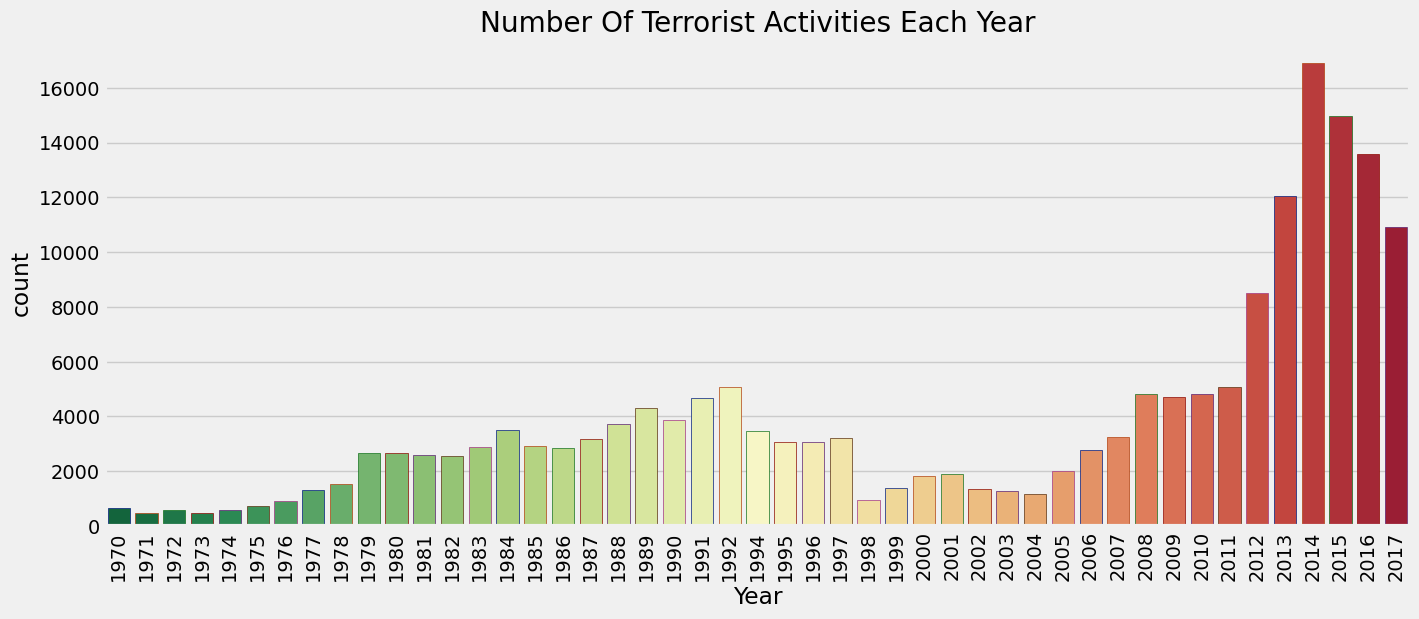

In [11]:
# 연도별 테러 횟수
plt.subplots(figsize = (15, 6))
sns.countplot(x = data_terror['Year'],
              palette='RdYlGn_r',
              edgecolor = sns.color_palette('dark', 7))
plt.xticks(rotation = 90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

2012년 테러 급증 이유
1. 유럽의 경제 위기
2. 미국의 이란 견제
3. 2011년 오사마 빈 라덴의 죽음을 확인한 알 카에다가 미국과 동맹국에 보복선언
4. 미국, 일본을 포함한 선진국들의 경제 상황 악화

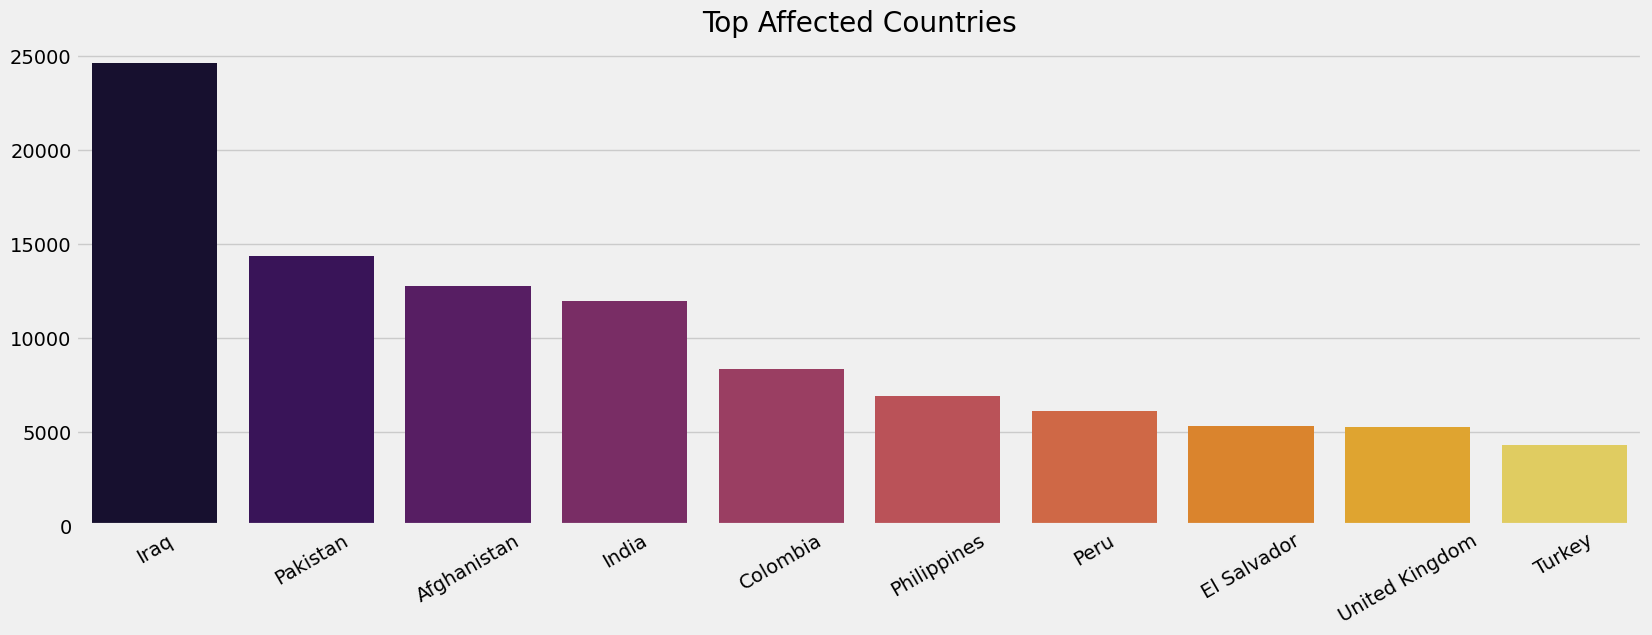

In [12]:
#테러가 많이 일어난 상위 10개 국가 시각화
plt.subplots(figsize = (18,6))
sns.barplot(x=data_terror['Country'].value_counts()[:10].index,
            y= data_terror['Country'].value_counts()[:10].values,
            palette='inferno')
plt.title('Top Affected Countries')
plt.xticks(rotation = 30)
plt.show()

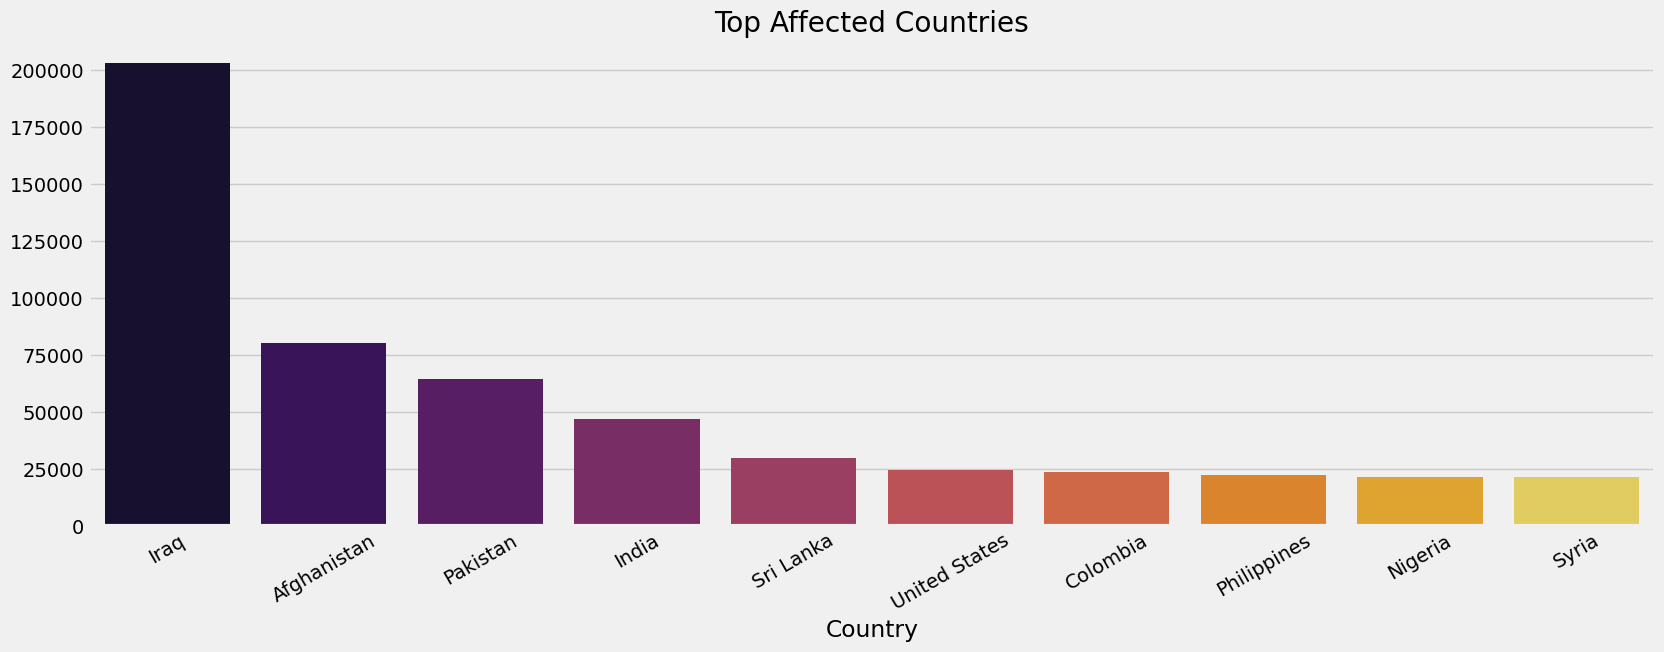

In [13]:
# 테러로 인한 사상자가 많은 상위 10개 국가 시각화
plt.subplots(figsize = (18, 6))
sns.barplot(x = data_terror.groupby('Country')['casualities'].sum().sort_values(ascending=False)[:10].index, 
            y = data_terror.groupby('Country')['casualities'].sum().sort_values(ascending=False)[:10].values,
            palette='inferno')
plt.title('Top Affected Countries')
plt.xticks(rotation = 30)
plt.show()

1. 이라크는 테러 발생율과 사상자가 가장 많은 국가이다.
2. 이라크와 비교했을때 아프가니스탄과 파키스탄은 발생율 대비 사상자가 적다.
3. 스리랑카, 미국, 시리아는 테러 발생횟수 대비 사상자수가 많다.

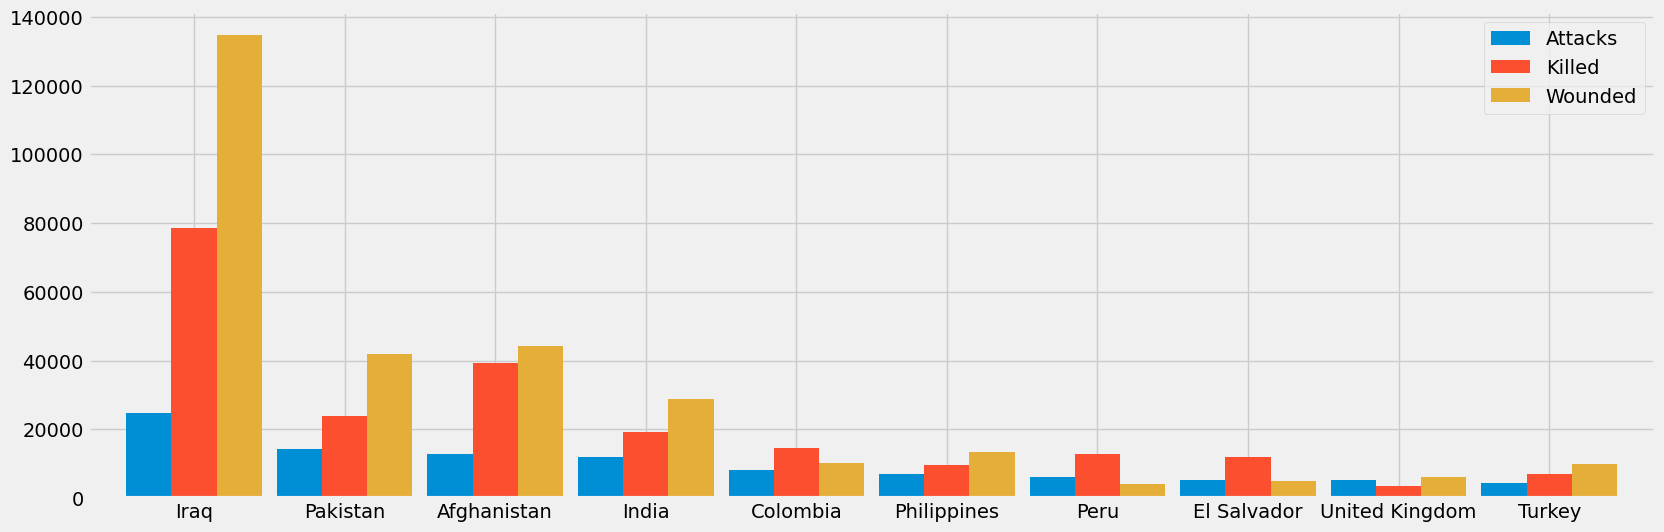

In [14]:
#각 국가별 사망자 수와 부상자 수
coun_terror = data_terror['Country'].value_counts()[:10].to_frame()
coun_terror.columns = ['Attacks']

coun_kill = data_terror.groupby('Country')['Killed'].sum().to_frame()
coun_wounded = data_terror.groupby('Country')['Wounded'].sum().to_frame()
coun_casualities = coun_kill.merge(coun_wounded, left_index = True, right_index = True, how = 'left')

coun_terror.merge(coun_casualities, left_index = True, right_index = True, how = 'left').plot.bar(width = 0.9)
fig=plt.gcf()
plt.xticks(rotation = 0)
fig.set_size_inches(18, 6)
plt.show()


1. 이라크는 테러 발생율 대비 사망자 및 부상자가 많다.
2. 대체로 부상자가 사망자 수보다 많다.
3. 콜롬비아, 페루, 엘살바도르는 사망자가 부상자보다 많다.


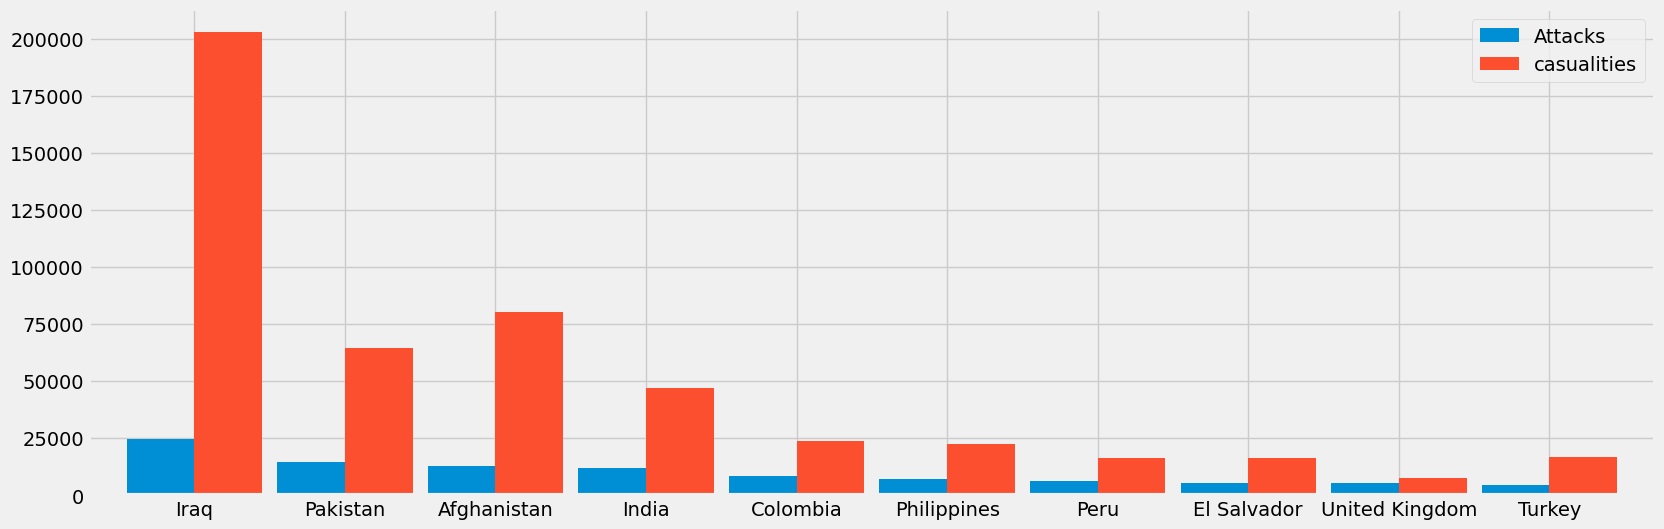

In [15]:
# 각 국가별 테러 횟수와 사상자 수 (부상자 + 사망자 수)
coun_terror = data_terror['Country'].value_counts()[:10].to_frame()
coun_terror.columns = ['Attacks']

coun_casualities = data_terror.groupby('Country')['casualities'].sum().to_frame()

coun_terror.merge(coun_casualities, left_index = True, right_index = True, how = 'left').plot.bar(width = 0.9)
fig=plt.gcf()
plt.xticks(rotation = 0)
fig.set_size_inches(18, 6)
plt.show()

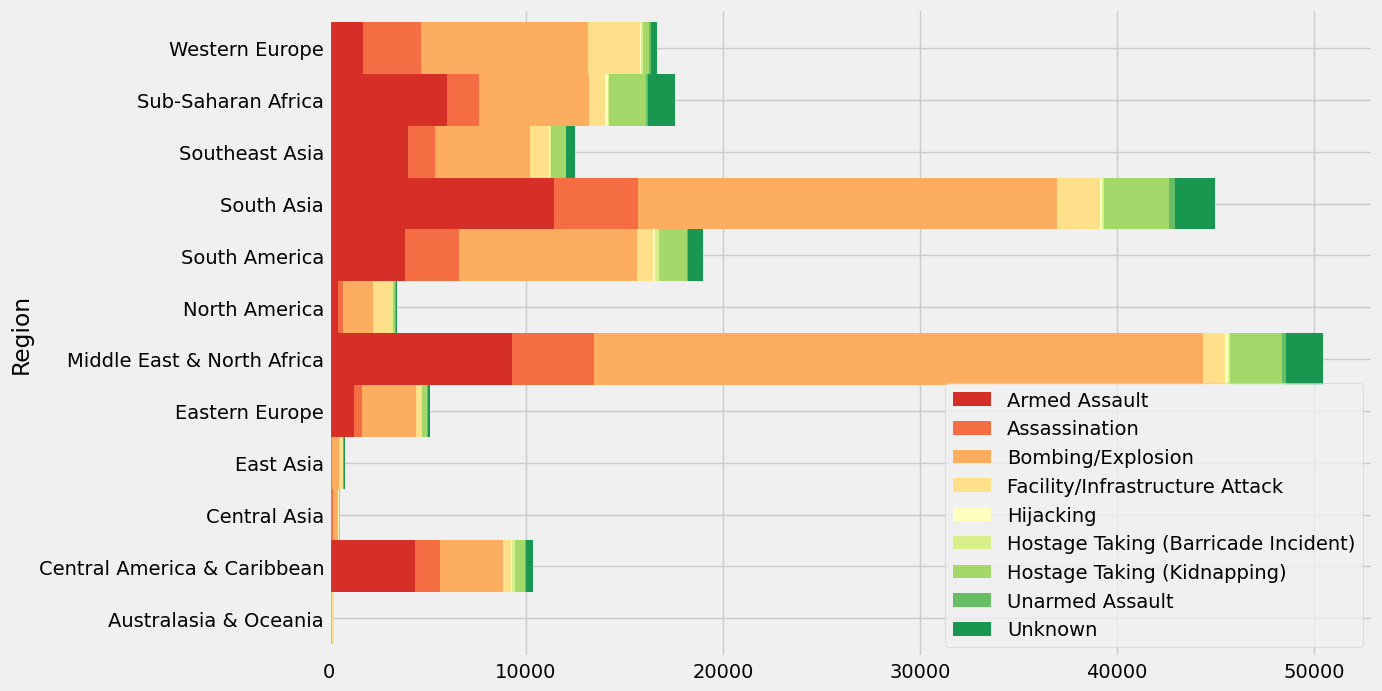

In [16]:
# 각 지역별 테러 형태
pd.crosstab(data_terror.Region, data_terror.AttackType).plot.barh(stacked = True, width = 1,color = sns.color_palette('RdYlGn', 9))
fig=plt.gcf()
fig.set_size_inches(12, 8)
plt.legend(loc='lower right')
plt.show()

일본이 겪은 테러 데이터 시각화 및 분석

In [17]:
# 일본 데이터프레임 생성
terror_Japan = data_terror[data_terror['Country'] == 'Japan']

In [18]:
terror_Japan

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,NaN
162,1970,3,31,Japan,East Asia,Fukouka,33.580412,130.396361,Hijacking,0.0,0.0,Boeing 727,NaN,Japanese Red Army (JRA),Airports & Aircraft,Explosives,NaN,0.0
1851,1973,4,25,Japan,East Asia,Yokosuka,35.281341,139.672200,Facility/Infrastructure Attack,0.0,0.0,US Ikego Ammo Storage Area,NaN,Unknown,Military,Incendiary,NaN,0.0
2003,1973,8,29,Japan,East Asia,Tokyo,35.689125,139.747742,Facility/Infrastructure Attack,0.0,0.0,U.S. Embassy Annex,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,0.0
2472,1974,7,15,Japan,East Asia,Itami,34.784306,135.400947,Hijacking,0.0,0.0,DC-8,NaN,Unknown,Airports & Aircraft,Melee,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152403,2015,8,27,Japan,East Asia,Tokyo,35.689125,139.747742,Facility/Infrastructure Attack,0.0,0.0,Railway Track Cables,08/27/2015: An assailant set fire to East Japa...,Anti-Nuclear extremists,Transportation,Incendiary,"An individual, identified as Izaya Noda, claim...",0.0
152515,2015,8,30,Japan,East Asia,Tokyo,35.689125,139.747742,Facility/Infrastructure Attack,0.0,0.0,Railway Track Cables,08/30/2015: An assailant set fire to a cable a...,Anti-Nuclear extremists,Transportation,Incendiary,"An individual, identified as Izaya Noda, claim...",0.0
152744,2015,9,5,Japan,East Asia,Kokubunji,35.700489,139.487034,Facility/Infrastructure Attack,0.0,0.0,Railway Track Cables,09/05/2015: An assailant set fire to a cable s...,Anti-Nuclear extremists,Transportation,Incendiary,"An individual, identified as Izaya Noda, claim...",0.0
155836,2015,11,23,Japan,East Asia,Tokyo,35.689125,139.747742,Bombing/Explosion,0.0,0.0,Shrine,11/23/2015: An explosive device detonated at t...,Unknown,Religious Figures/Institutions,Explosives,"The specific motive is unknown; however, sourc...",0.0


In [19]:
terror_Japan.head()

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,NaN
162,1970,3,31,Japan,East Asia,Fukouka,33.580412,130.396361,Hijacking,0.0,0.0,Boeing 727,NaN,Japanese Red Army (JRA),Airports & Aircraft,Explosives,NaN,0.0
1851,1973,4,25,Japan,East Asia,Yokosuka,35.281341,139.672200,Facility/Infrastructure Attack,0.0,0.0,US Ikego Ammo Storage Area,NaN,Unknown,Military,Incendiary,NaN,0.0
2003,1973,8,29,Japan,East Asia,Tokyo,35.689125,139.747742,Facility/Infrastructure Attack,0.0,0.0,U.S. Embassy Annex,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,0.0
2472,1974,7,15,Japan,East Asia,Itami,34.784306,135.400947,Hijacking,0.0,0.0,DC-8,NaN,Unknown,Airports & Aircraft,Melee,NaN,0.0


In [20]:
# 데이터 개수 확인
terror_Japan.shape

(402, 18)

In [21]:
terror_Japan.isna().sum()

Year             0
Month            0
Day              0
Country          0
Region           0
city             0
latitude         7
longitude        7
AttackType       0
Killed          29
Wounded         27
Target           1
Summary        358
Group            0
Target_type      0
Weapon_type      0
Motive         362
casualities     29
dtype: int64

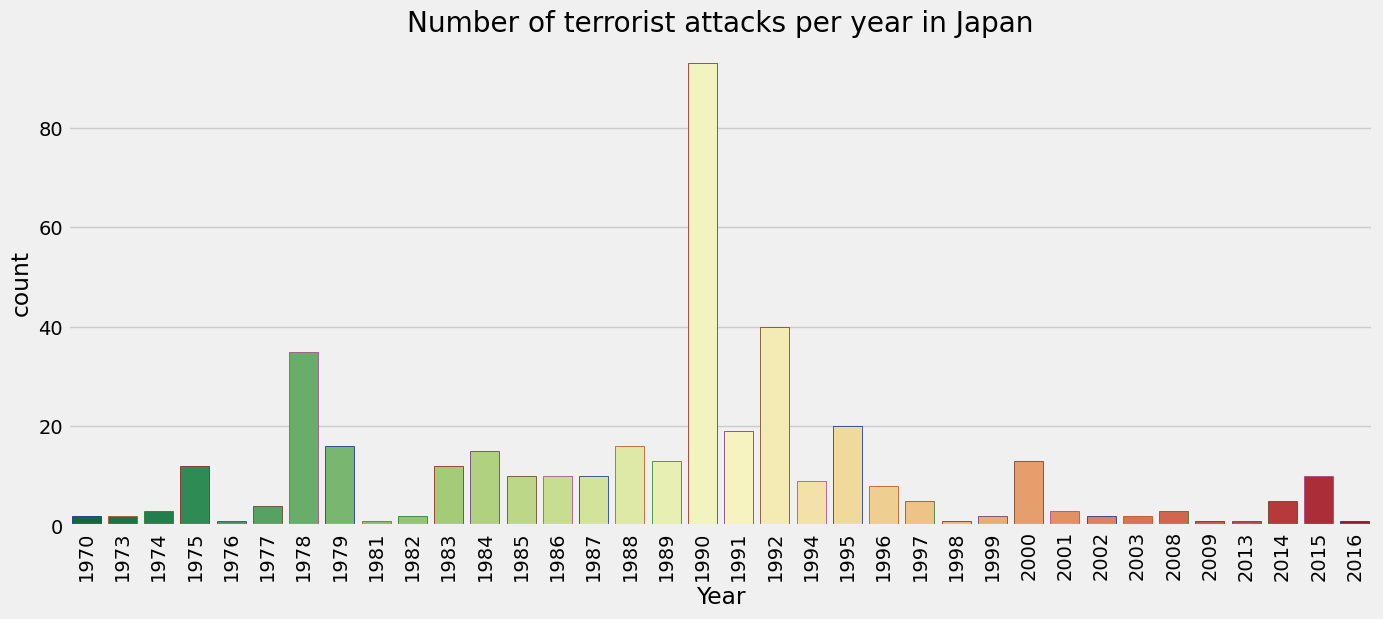

In [22]:
plt.subplots(figsize = (15, 6))
sns.countplot(x = terror_Japan['Year'],
              palette='RdYlGn_r',
              edgecolor = sns.color_palette('dark', 7))
plt.xticks(rotation = 90)
plt.title('Number of terrorist attacks per year in Japan')
plt.show()

일본이 1990년도에 테러 횟수가 많은 이유
1. 당시 일본이 경제 불황이였다.

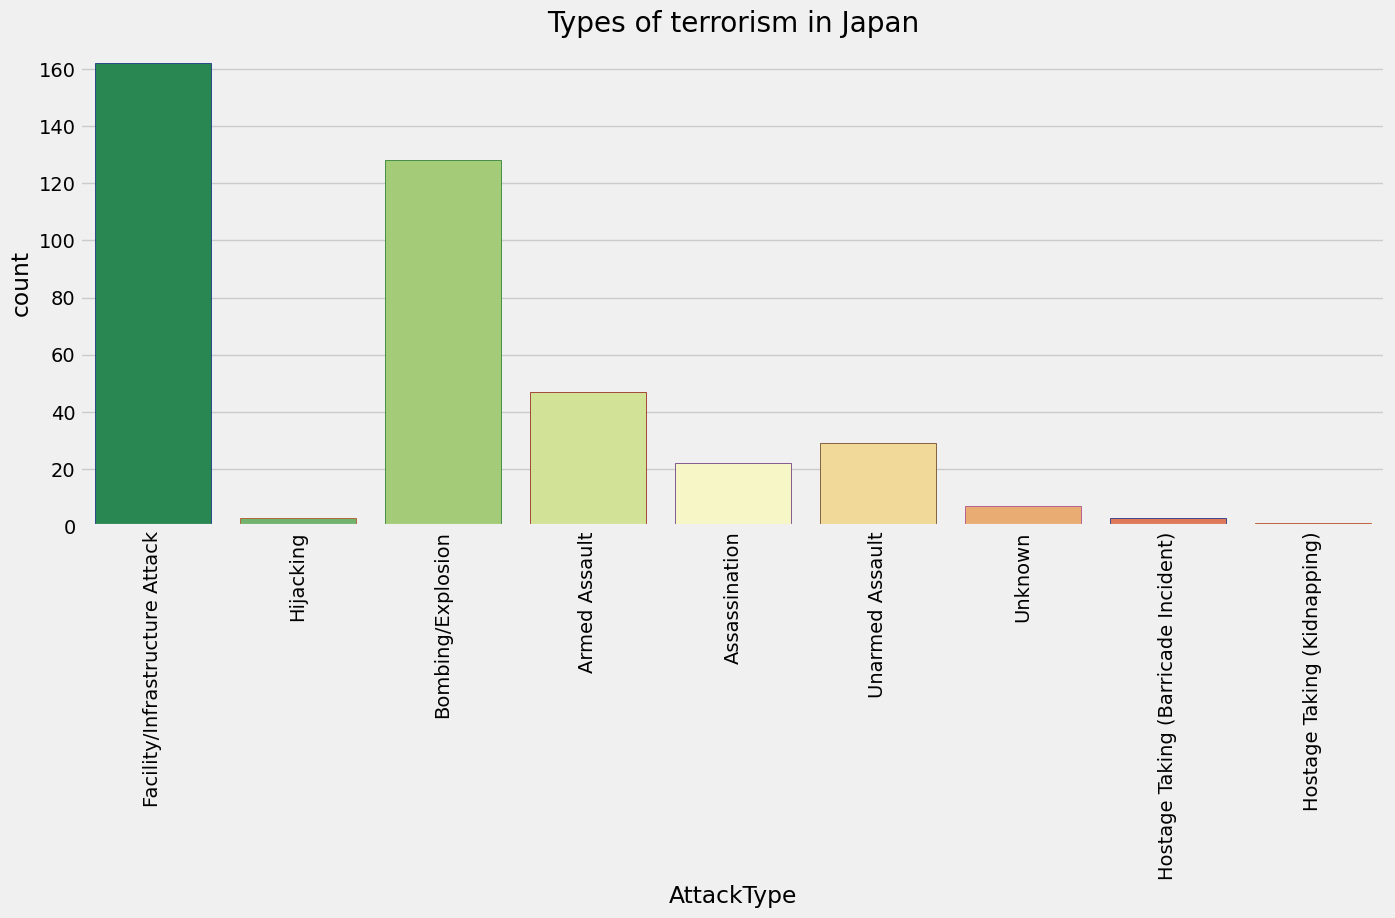

In [23]:
#테러 종류 시각화
plt.subplots(figsize = (15, 6))
sns.countplot(x = terror_Japan['AttackType'],
              palette='RdYlGn_r',
              edgecolor = sns.color_palette('dark', 7))
plt.xticks(rotation = 90)
plt.title('Types of terrorism in Japan')
plt.show()

일본은 건물 테러 및 폭탄 테러의 발생 빈도가 높다.

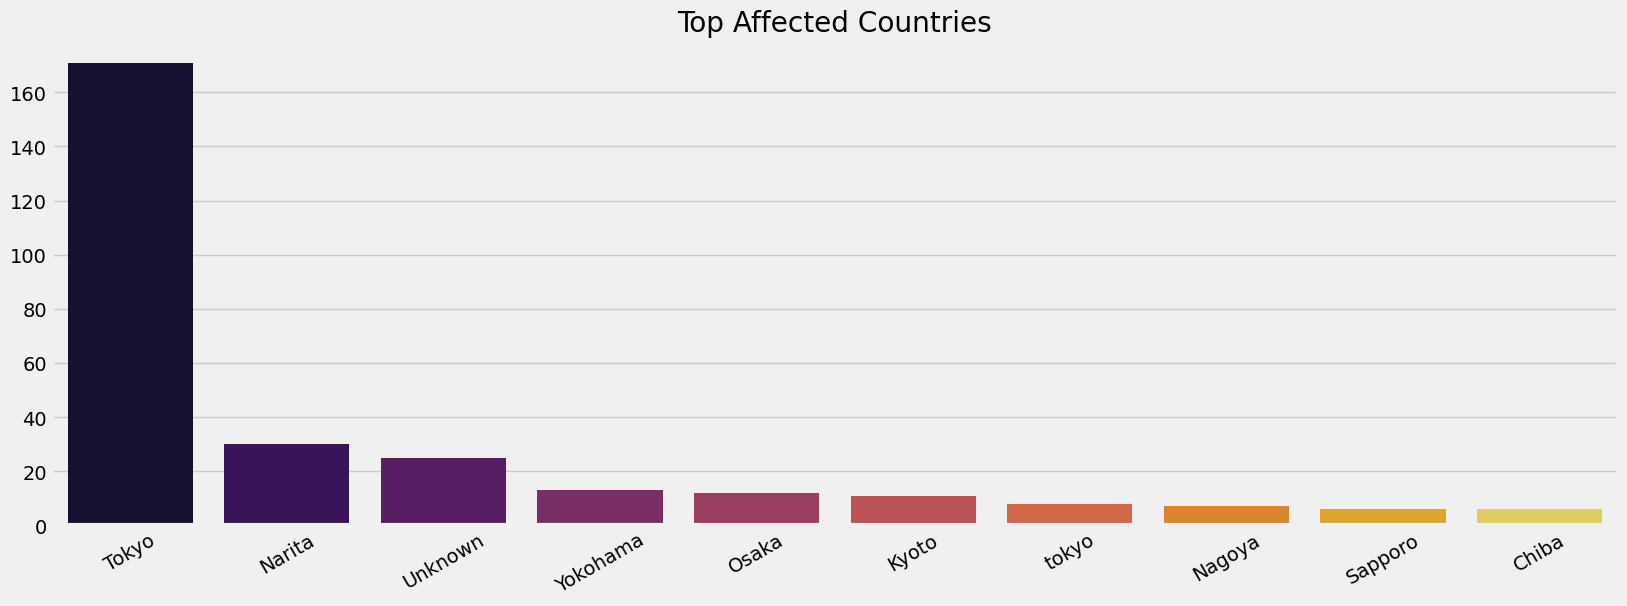

In [24]:
#테러가 많이 일어난 상위 10개 도시 시각화
plt.subplots(figsize = (18,6))
sns.barplot(x=terror_Japan['city'].value_counts()[:10].index,
            y= terror_Japan['city'].value_counts()[:10].values,
            palette='inferno')
plt.title('Top Affected Countries')
plt.xticks(rotation = 30)
plt.show()

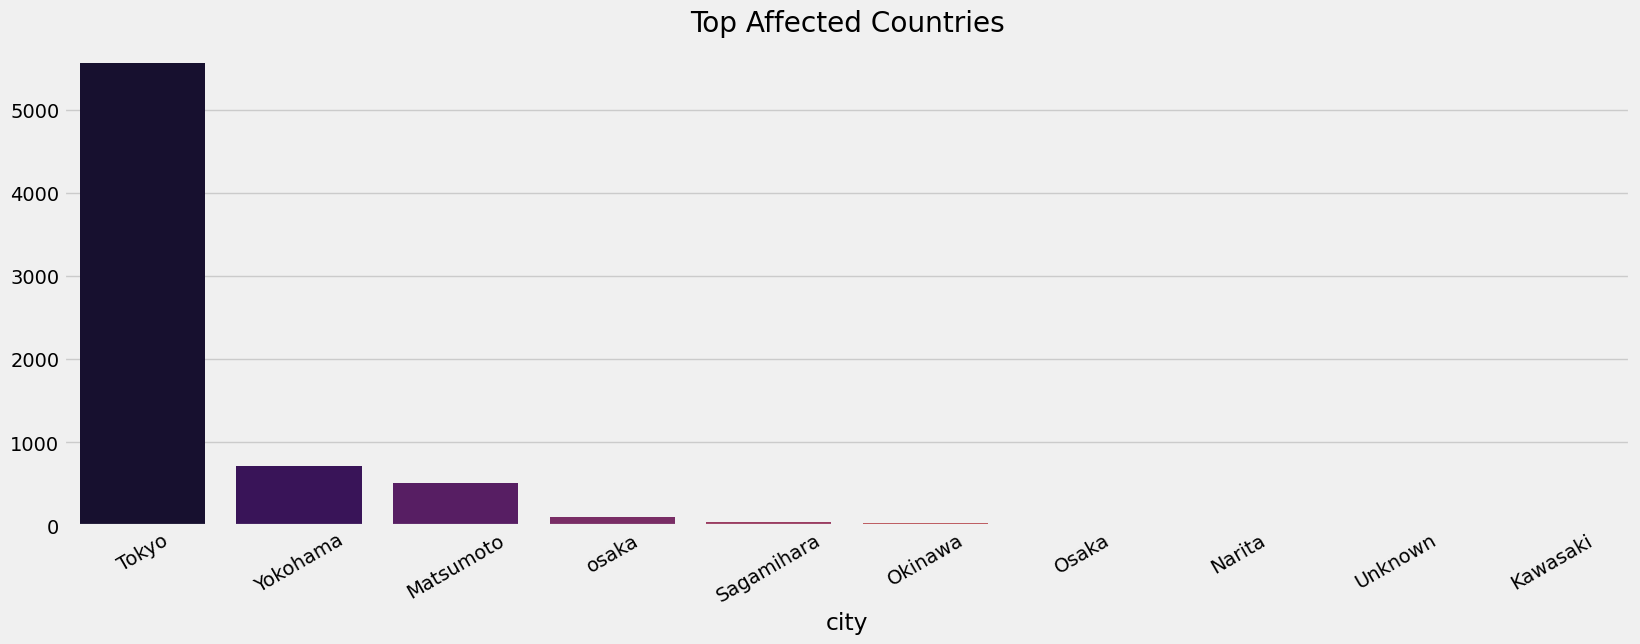

In [25]:
# 테러로 인한 사상자가 많은 상위 10개 도시 시각화
plt.subplots(figsize = (18, 6))
sns.barplot(x = terror_Japan.groupby('city')['casualities'].sum().sort_values(ascending=False)[:10].index, 
            y = terror_Japan.groupby('city')['casualities'].sum().sort_values(ascending=False)[:10].values,
            palette='inferno')
plt.title('Top Affected Countries')
plt.xticks(rotation = 30)
plt.show()

일본은 전체적으로 발생율 대비 부상자 수 및 사망자 수가 없다.

우리나가 겪은 테러 데이터 시각화 및 분석

In [26]:
# 우리나라 데이터프레임 생성
terror_Korea = data_terror[data_terror['Country'] == 'South Korea']

In [27]:
terror_Korea.head()

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
2514,1974,8,15,South Korea,East Asia,Seoul,37.566535,126.977969,Assassination,1.0,0.0,"wife, Pres. Chung Hu Park",NaN,Korean Youth League,Government (General),Firearms,NaN,1.0
15734,1982,3,18,South Korea,East Asia,Busan,35.179554,129.075642,Facility/Infrastructure Attack,1.0,3.0,US Government Information Office,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,4.0
19820,1983,9,22,South Korea,East Asia,Daegu,35.871435,128.601445,Bombing/Explosion,1.0,4.0,US Cultural Center (housed in a 5 story building),NaN,Unknown,Government (Diplomatic),Explosives,NaN,5.0
29151,1986,9,14,South Korea,East Asia,Gimpo International Airport,37.558947,126.798341,Bombing/Explosion,5.0,19.0,Kimpo International Airport,NaN,Unknown,Airports & Aircraft,Explosives,NaN,24.0
29696,1986,12,15,South Korea,East Asia,Busan,35.179554,129.075642,Armed Assault,0.0,11.0,US Information Svce Bldg,NaN,Student Radicals,Government (General),Melee,NaN,11.0


In [28]:
terror_Korea.isna().sum()

Year            0
Month           0
Day             0
Country         0
Region          0
city            0
latitude        0
longitude       0
AttackType      0
Killed          3
Wounded         3
Target          1
Summary        33
Group           0
Target_type     0
Weapon_type     0
Motive         33
casualities     3
dtype: int64

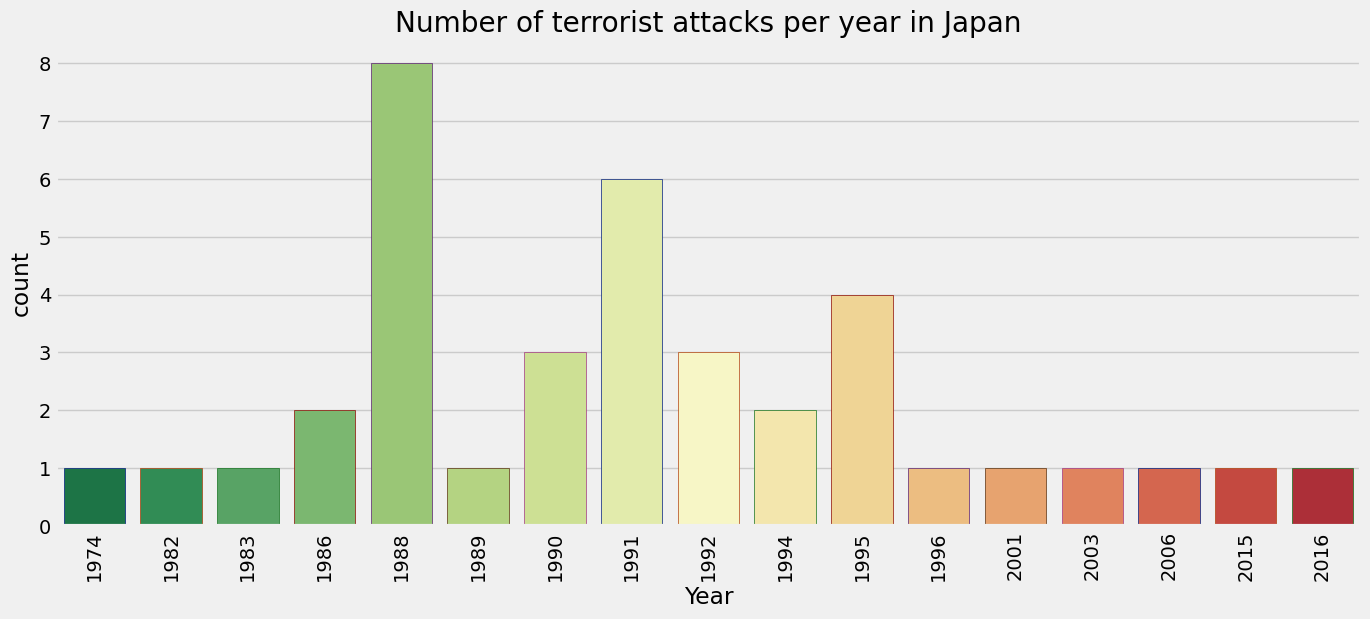

In [33]:
plt.subplots(figsize = (15, 6))
sns.countplot(x = terror_Korea['Year'],
              palette='RdYlGn_r',
              edgecolor = sns.color_palette('dark', 7))
plt.xticks(rotation = 90)
plt.title('Number of terrorist attacks per year in Japan')
plt.show()

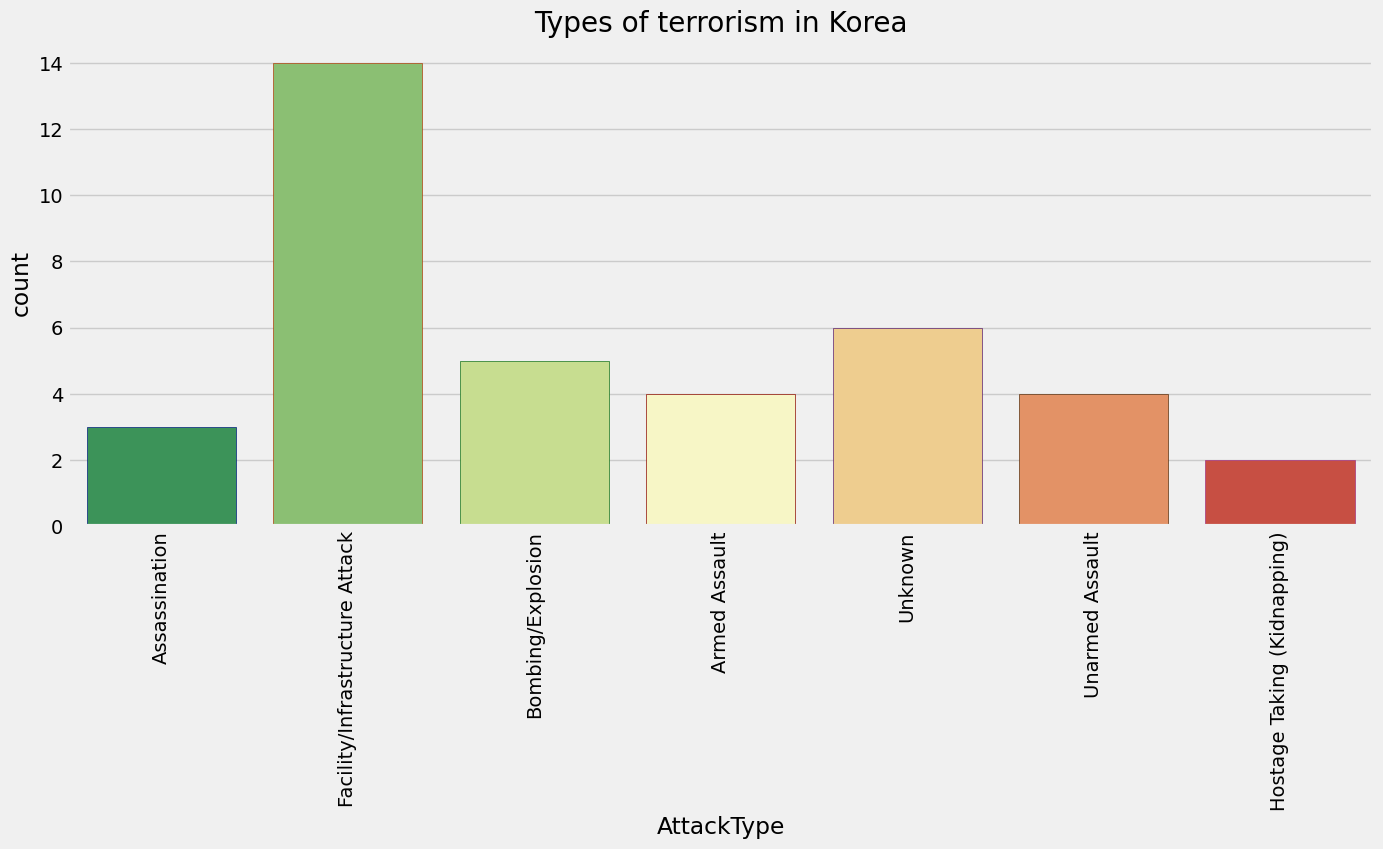

In [30]:
#테러 종류 시각화
plt.subplots(figsize = (15, 6))
sns.countplot(x = terror_Korea['AttackType'],
              palette='RdYlGn_r',
              edgecolor = sns.color_palette('dark', 7))
plt.xticks(rotation = 90)
plt.title('Types of terrorism in Korea')
plt.show()

ddd

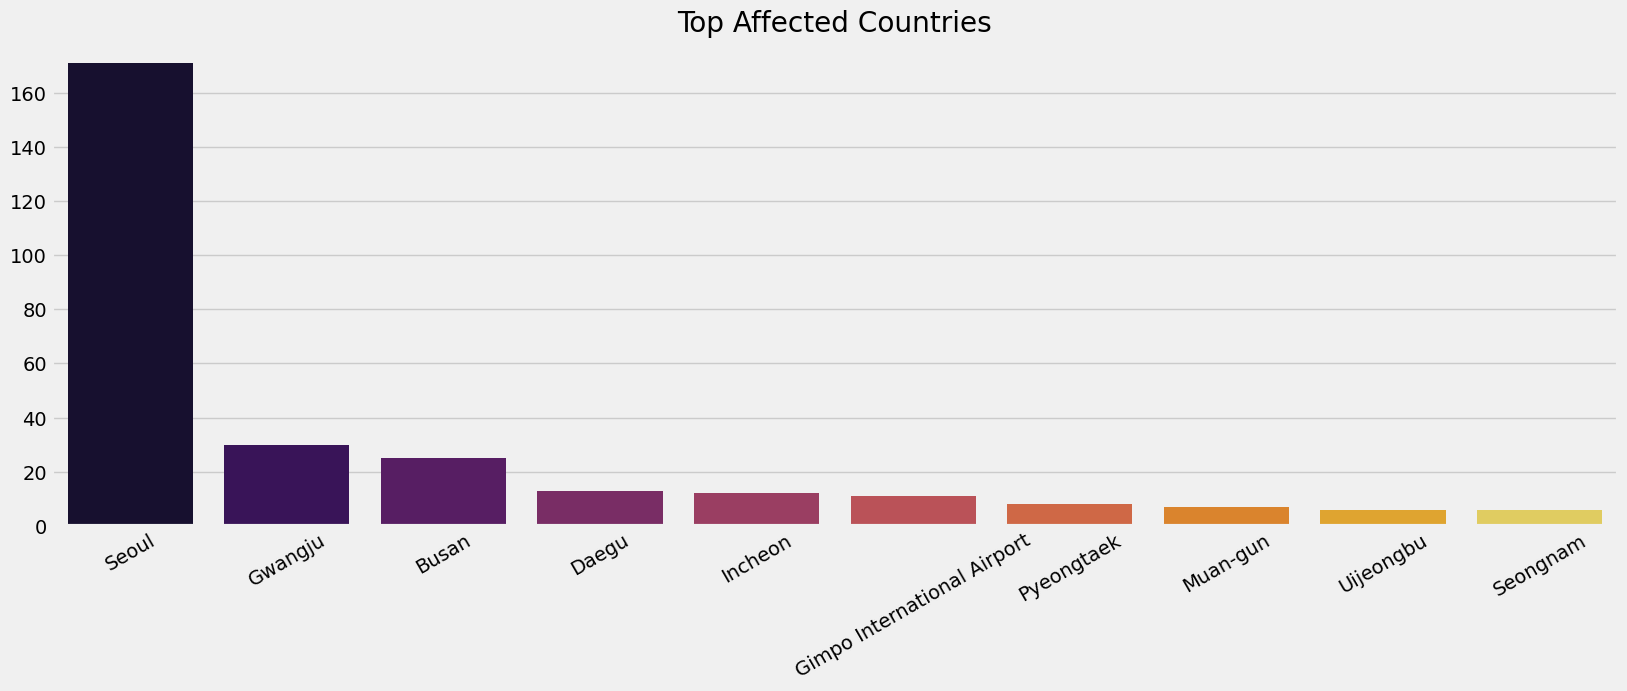

In [31]:
#테러가 많이 일어난 상위 10개 도시 시각화
plt.subplots(figsize = (18,6))
sns.barplot(x=terror_Korea['city'].value_counts()[:10].index,
            y= terror_Japan['city'].value_counts()[:10].values,
            palette='inferno')
plt.title('Top Affected Countries')
plt.xticks(rotation = 30)
plt.show()

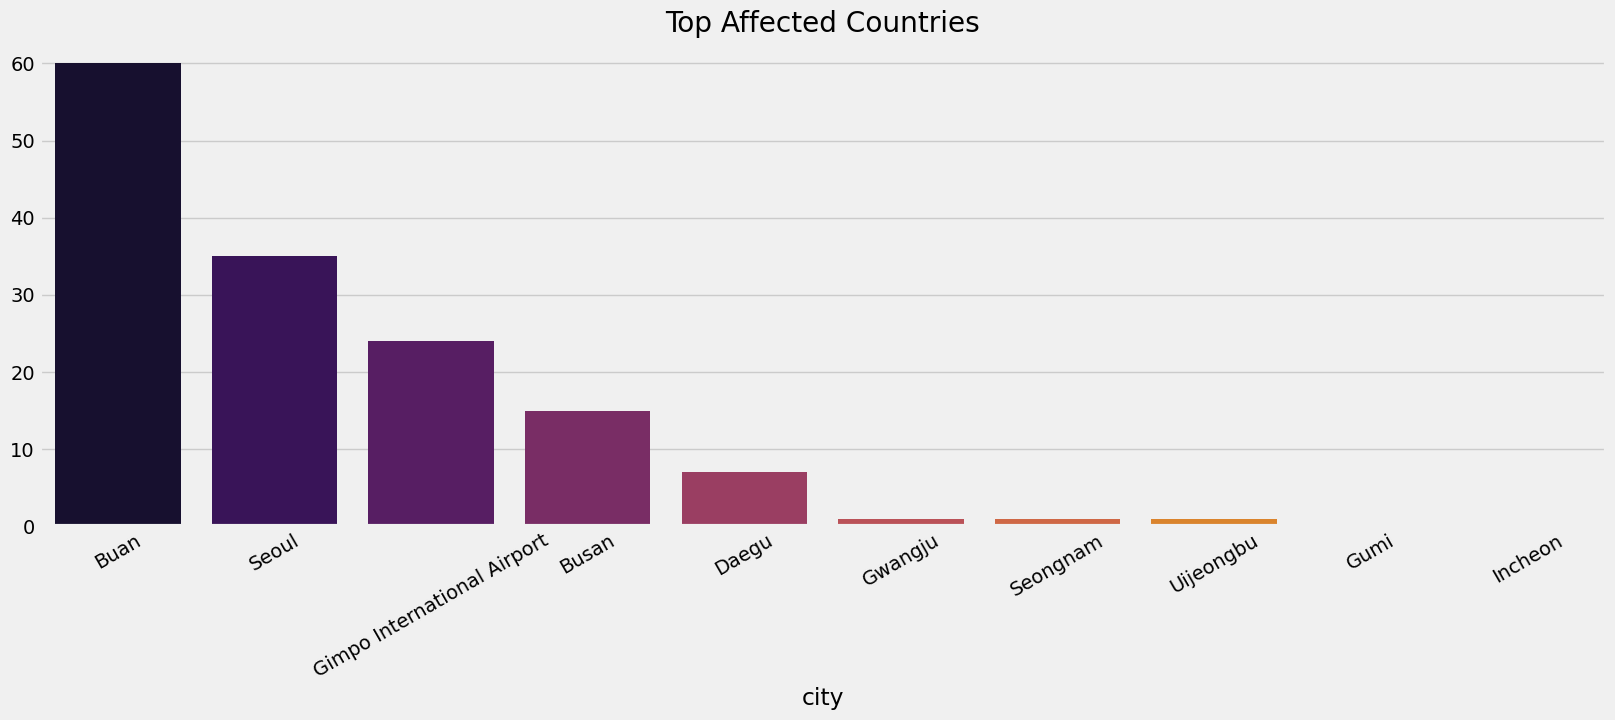

In [32]:
# 테러로 인한 사상자가 많은 상위 10개 도시 시각화
plt.subplots(figsize = (18, 6))
sns.barplot(x = terror_Korea.groupby('city')['casualities'].sum().sort_values(ascending=False)[:10].index, 
            y = terror_Korea.groupby('city')['casualities'].sum().sort_values(ascending=False)[:10].values,
            palette='inferno')
plt.title('Top Affected Countries')
plt.xticks(rotation = 30)
plt.show()

사상자 및 테러 발생율 비교
1. 서울은 발생율에 비해 사상자가 많지않다.
2. 부안은 테러로 인한 사상자가 발생율에 비해 많다.